# 이민정 week4 팀 미션 문제 풀이

각종 모듈 임포트

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1

Pandas에서 지원하는 Series에 대해서 한번 다뤄보겠습니다.아래와 같이 인덱스와 데이터가 주어져있을때 Pandas의 Series 형태로 만들어보세요.

주어진 데이터에서 10이상 20이하의 데이터만 출력하는 Series를 재정의 해보세요.

In [23]:
idx = ["HDD", "SSD", "USB", "CLOUD"]
data = [19, 11, 5, 97]

In [24]:
#위 데이터로 Series를 구현해보세요

series = pd.Series(data, idx)
print(series)

HDD      19
SSD      11
USB       5
CLOUD    97
dtype: int64


In [25]:
#10 이상 20 이하의 데이터만 출력하는 series 재정의

series = series[series >= 10][series <= 20]

print(series)

HDD    19
SSD    11
dtype: int64


## Q2

Pandas에서 지원하는 Dataframe을 다뤄보도록 하겠습니다. 다음과 같이 과일과 야채 각각 정리된 데이터가 있습니다. 이 두 데이터를 따로 보기엔 효율성이 떨어지니, 각 표에 정리된 데이터를 각각 하나의 데이터 프레임으로 생성한 후 다음 세부 구현을 진행해보세요.

두 데이터를 하나의 데이터로 결합해보세요.
결합한 데이터의 type을 이용해 데이터를 정렬해보세요.
최종적으로 과일과 야채 중 가장 비싼 가격의 합을 출력해보세요.

In [26]:
df1 = pd.DataFrame(
            [['cherry', 'Fruit', 100],
            ['mango', 'Fruit', 110],
            ['potato', 'Vegetable', 60],
            ['onion', 'Vegetable', 80]],
            columns = ["Name", "Type", "Price"])
df2 = pd.DataFrame(
            [['pepper', 'Vgetable', 50],
            ['carrot', 'Vegetable', 70],
            ['banana', 'Fruit', 90],
            ['kiwi', 'Fruit', 120]],
            columns = ["Name", "Type", "Price"])

df1

,Name,Type,Price
0,cherry,Fruit,100
1,mango,Fruit,110
2,potato,Vegetable,60
3,onion,Vegetable,80


In [27]:
df3 = pd.concat([df1, df2], ignore_index = True) #두 dataframe을 합칠 때 index 번호는 신경쓰지 않기

# 다른 방법
# df3 = df1.append(df2)

df3

,Name,Type,Price
0,cherry,Fruit,100
1,mango,Fruit,110
2,potato,Vegetable,60
3,onion,Vegetable,80
4,pepper,Vgetable,50
5,carrot,Vegetable,70
6,banana,Fruit,90
7,kiwi,Fruit,120


In [28]:
#fruit와 vegetable의 type에 따라 정렬하고, 가격을 내림차순으로 정리

df_fruit = df3.loc[df3["Type"] == "Fruit"]
df_fruit_sorted = df_fruit.sort_values(by="Price", ascending=False)

df_veg = df3.loc[df3["Type"] == "Vegetable"]
df_veg_sorted = df_veg.sort_values(by="Price", ascending=False)

print(df_fruit_sorted)
print(df_veg_sorted)

     Name   Type  Price
7    kiwi  Fruit    120
1   mango  Fruit    110
0  cherry  Fruit    100
6  banana  Fruit     90
     Name       Type  Price
3   onion  Vegetable     80
5  carrot  Vegetable     70
2  potato  Vegetable     60


In [29]:
#Fruit와 Vegetable 상위 2개의 가격의 합을 출력

print("Sum of Top 2 Fruit Price : ", sum(df_fruit_sorted["Price"].iloc[:2]))
print("Sum of Top 2 Vegetable Price : ", sum(df_veg_sorted["Price"].iloc[:2]))

Sum of Top 2 Fruit Price :  230
Sum of Top 2 Vegetable Price :  150


## Q3

총 5명에서 게임을 진행했습니다. 총 5개 라운드를 진행했고, 각각 참여자당 5개의 점수를 받았습니다. 주어진 데이터를 dataframe의 형태로 만든 후 각 세부 구현을 진행해보세요.

참여자의 이름을 index로 해서 각 라운드의 columns를 추가해 데이터를 정리해보세요.
6번째 라운드의 점수가 아래와 같을 때, 이를 추가해보세요.
각 데이터의 mean, max, min 값을 출력해보세요.

In [30]:
idx = ["Sue", "Ryan", "Jay", "Jane", "Anna"]
col = ["round_1", "round_2", "round_3", "round_4", "round_5"]
data = [[55, 65, 60, 66, 57],
        [64, 77, 71, 79, 67],
        [88, 81, 79, 89, 77],
        [45, 35, 30, 46, 47],
        [91, 96, 90, 97, 99]]

In [31]:
#위 데이터를 이용해 dataframe을 구성해보세요.

df = pd.DataFrame(data, idx, col)
df

,round_1,round_2,round_3,round_4,round_5
Sue,55,65,60,66,57
Ryan,64,77,71,79,67
Jay,88,81,79,89,77
Jane,45,35,30,46,47
Anna,91,96,90,97,99


In [32]:
#df에 새로운 column인 round_6의 데이터 [11, 15, 13, 17, 19] 추가

col_round_6 = [11, 15, 13, 17, 19]
df["round_6"] = col_round_6

# 다른 방법들
# df.loc[:, "round_6"] = col_round_6
# df = df.assign(round_6 = col_round_6)

In [33]:
print(df)

      round_1  round_2  round_3  round_4  round_5  round_6
Sue        55       65       60       66       57       11
Ryan       64       77       71       79       67       15
Jay        88       81       79       89       77       13
Jane       45       35       30       46       47       17
Anna       91       96       90       97       99       19


In [34]:
#각 데이터의 mean, max, min 값 구해 출력

print(df.describe().loc[["mean", "max", "min"]])

      round_1  round_2  round_3  round_4  round_5  round_6
mean     68.6     70.8     66.0     75.4     69.4     15.0
max      91.0     96.0     90.0     97.0     99.0     19.0
min      45.0     35.0     30.0     46.0     47.0     11.0


## Q4

다음과 같은 데이터 t가 주어져있을때, 출력 예시로 제안된 그래프를 출력해보세요.

Plot 함수 내 각 마커의 색상과 모양을 표현하는 방법을 확인해보세요.

In [35]:
t = np.arange(0., 5., 0.2)

In [36]:
#사용 마커: red dashes, blue squares, green triangles

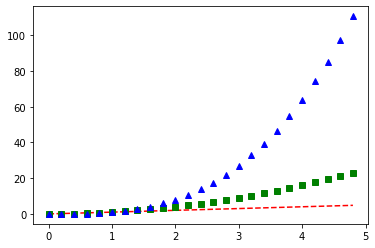

In [37]:
plt.plot(t, t, c="r", ls="dashed")
plt.plot(t, t**2, c="g", ls= "none", marker="s")
plt.plot(t, t**3, c="b", ls= "none", marker="^")

plt.show()

## Q5

Matplotlib을 이용해서 아래와 같은 데이터가 주어졌을때, 출력 예시와 같은 형태로 그래프를 출력해보세요.

각 그룹별 데이터를 다른 형식의 그래프로 생성해보세요. 각각 막대, 점, 선 그래프입니다.

In [38]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

In [39]:
plt.figure(figsize=(9, 3))

<Figure size 648x216 with 0 Axes>

<Figure size 648x216 with 0 Axes>

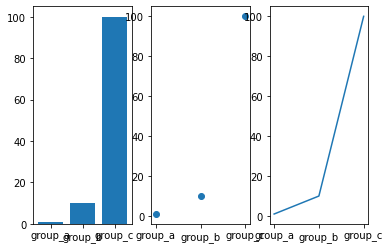

In [40]:
#3개의 plot 그리기

plt.subplot(1, 3, 1) #그림은 1개의 행, 3개의 열로 되어 있으며 이것은 첫 번째 plot이다
plt.bar(names, values)

plt.subplot(1, 3, 2) #그림은 1개의 행, 3개의 열로 되어 있으며 이것은 두 번째 plot이다
plt.scatter(names, values)

plt.subplot(1, 3, 3) #그림은 1개의 행, 3개의 열로 되어 있으며 이것은 세 번째 plot이다
plt.plot(names, values)

plt.show() #완성된 그래프 flush

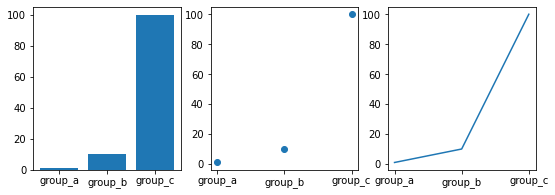

In [41]:
fig = plt.figure(figsize=(9, 3))

ax_1 = fig.add_subplot(1, 3, 1)
ax_2 = fig.add_subplot(1, 3, 2)
ax_3 = fig.add_subplot(1, 3, 3)

ax_1.bar(names, values)
ax_2.scatter(names, values)
ax_3.plot(names, values)

plt.show() #완성된 그래프 flush